# Testing the BPT Mask Code

Ragadeepika Pucha, Stephanie Juneau, Becky Canning, Mar Mezcua

In [1]:
import numpy as np
import os, sys

from astropy.table import Table

from time import time
import matplotlib.pyplot as plt

## DESI functions
from desiutil.bitmask import BitMask

sys.path.append('../py/')
from set_agn_masks import create_bpt_mask

import yaml
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
## Setting up plots

settings = {
    'font.size':22,
    'axes.linewidth':3.0,
    'xtick.major.size':6.0,
    'xtick.minor.size':4.0,
    'xtick.major.width':3.0,
    'xtick.minor.width':1.5,
    'xtick.direction':'in', 
    'xtick.minor.visible':True,
    'xtick.top':True,
    'ytick.major.size':6.0,
    'ytick.minor.size':4.0,
    'ytick.major.width':3.0,
    'ytick.minor.width':1.5,
    'ytick.direction':'in', 
    'ytick.minor.visible':True,
    'ytick.right':True
}

plt.rcParams.update(**settings)

In [3]:
## Loading the BPT bitmask definitions

file = open('../Sandbox/agn_masks.yaml', 'r')
bpt_defs = yaml.safe_load(file)

bpt_type = BitMask('bpt_type', bpt_defs)

### Some examples for working with bitmasks

In [4]:
bpt_type

bpt_type:
  - [BPT_AGN,          0, "Any BPT diagnostic indicates agn"]
  - [NII_BPT_AV,       1, "NII BPT diagnostic is avalible"]
  - [NII_SF,           2, "NII BPT Star-forming"]
  - [NII_COMP,         3, "NII BPT Composite"]
  - [NII_SY,           4, "NII BPT Seyfert"]
  - [NII_LINER,        5, "NII BPT LINER"]
  - [NII_QUIES,        6, "NII BPT Lines detected with (S/N) < 3"]
  - [SII_BPT_AV,       7, "SII BPT diagnostic is available"]
  - [SII_SF,           8, "SII BPT Star-forming"]
  - [SII_SY,           9, "SII BPT Seyfert"]
  - [SII_LINER,       10, "SII BPT LINER"]
  - [SII_QUIES,       11, "SII BPT Lines detected with (S/N) < 3"]
  - [OI_BPT_AV,       12, "OI BPT dianostic is available"]
  - [OI_SF,           13, "OI BPT Star-forming"]
  - [OI_SY,           14, "OI BPT Seyfert"]
  - [OI_LINER,        15, "OI BPT LINER"]

In [5]:
bpt_type.names()

['BPT_AGN',
 'NII_BPT_AV',
 'NII_SF',
 'NII_COMP',
 'NII_SY',
 'NII_LINER',
 'NII_QUIES',
 'SII_BPT_AV',
 'SII_SF',
 'SII_SY',
 'SII_LINER',
 'SII_QUIES',
 'OI_BPT_AV',
 'OI_SF',
 'OI_SY',
 'OI_LINER']

In [6]:
bpt_type.NII_SF ## Returns (2**assigned_bit)

4

In [7]:
bpt_type.mask(5) ## Returns (2**number)

32

In [8]:
bpt_type.NII_LINER ## NII_LINER has bit = 5

32

In [9]:
bpt_type.bitname(5)  ## Returns the name assigned for a particular bit

'NII_LINER'

In [10]:
bpt_type.bitnum('OI_SF')   ## Returns the bit assigned for a particular name

13

In [11]:
bpt_type.comment('SII_QUIES')   ## Returns the comment written for a particular name

'SII BPT Lines detected with (S/N) < 3'

### Testing the Code

In [12]:
start = time()
survey = 'sv3'
faprgrm = 'bright'
specred = 'everest'

# This creates the mask and adds it as a column
tab = create_bpt_mask(survey = survey, faprgrm = faprgrm, specred = specred)

end = time()

print ('Time Taken: ', round(end-start, 2), 'seconds')

Time Taken:  16.26 seconds


In [13]:
bptmask = tab['BPT_MASK']

In [14]:
nii_sf = (bptmask & bpt_type.NII_SF != 0)
nii_sy = (bptmask & bpt_type.NII_SY != 0)
nii_lin = (bptmask & bpt_type.NII_LINER != 0)
nii_comp = (bptmask & bpt_type.NII_COMP != 0)

In [15]:
len(tab), len(tab[nii_sf]), len(tab[nii_sy]), len(tab[nii_lin]), len(tab[nii_comp])

(730622, 55473, 483158, 481230, 9339)

In [16]:
sii_sf = (bptmask & bpt_type.SII_SF != 0)
sii_sy = (bptmask & bpt_type.SII_SY != 0)
sii_lin = (bptmask & bpt_type.SII_LINER != 0)

In [17]:
oi_sf = (bptmask & bpt_type.OI_SF != 0)
oi_sy = (bptmask & bpt_type.OI_SY != 0)
oi_lin = (bptmask & bpt_type.OI_LINER != 0)

In [18]:
xx_bptnii=np.log10(tab['NII_6584_FLUX']/tab['HALPHA_FLUX'])
xx_bptsii = np.log10((tab['SII_6716_FLUX']+tab['SII_6731_FLUX'])/tab['HALPHA_FLUX'])
xx_bptoi = np.log10(tab['OI_6300_FLUX']/tab['HALPHA_FLUX'])

yy_bpt=np.log10(tab['OIII_5007_FLUX']/tab['HBETA_FLUX'])

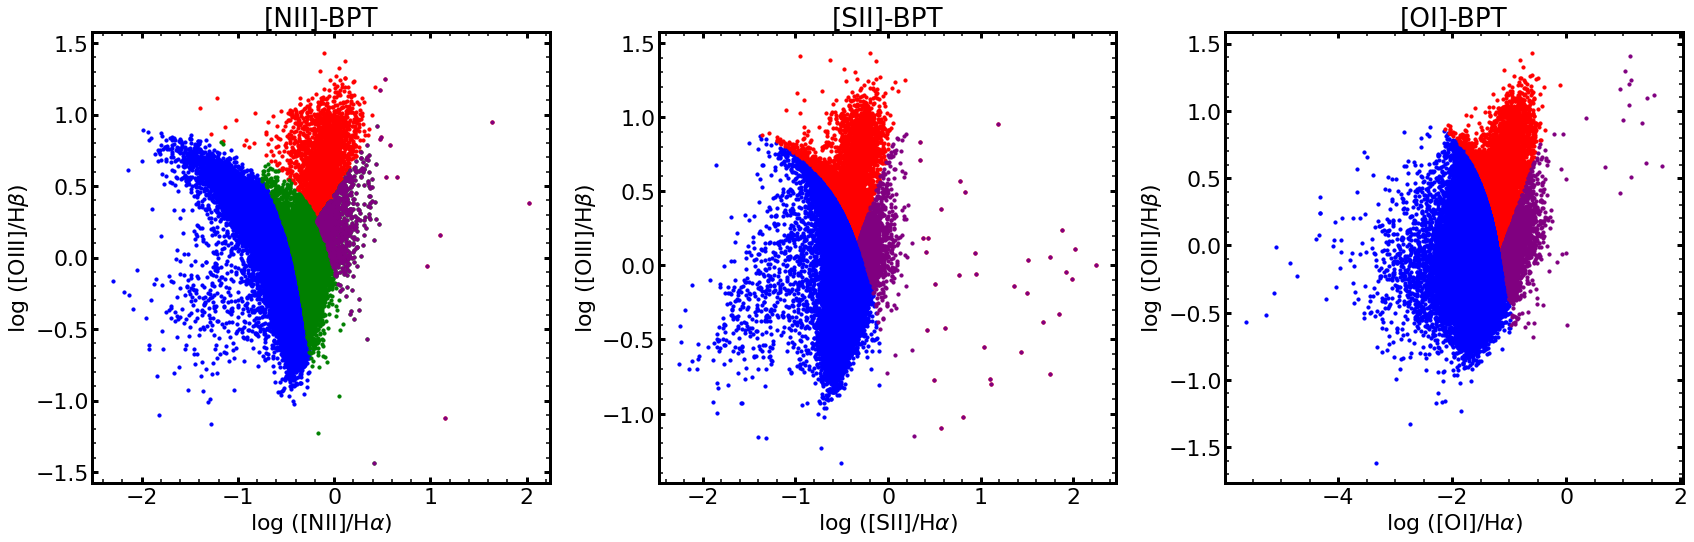

In [19]:
plt.figure(figsize = (24,8))

plt.subplot2grid((1,3), (0,0))
plt.title('[NII]-BPT')
plt.scatter(xx_bptnii[nii_sf], yy_bpt[nii_sf], color = 'b', s = 10)
plt.scatter(xx_bptnii[nii_sy], yy_bpt[nii_sy], color = 'r', s = 10)
plt.scatter(xx_bptnii[nii_comp], yy_bpt[nii_comp], color = 'g', s = 10)
plt.scatter(xx_bptnii[nii_lin], yy_bpt[nii_lin], color = 'purple', s = 10)
plt.xlabel('log ([NII]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')

plt.subplot2grid((1,3), (0,1))
plt.title('[SII]-BPT')
plt.scatter(xx_bptsii[sii_sf], yy_bpt[sii_sf], color = 'b', s = 10)
plt.scatter(xx_bptsii[sii_sy], yy_bpt[sii_sy], color = 'r', s = 10)
plt.scatter(xx_bptsii[sii_lin], yy_bpt[sii_lin], color = 'purple', s = 10)
plt.xlabel('log ([SII]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')

plt.subplot2grid((1,3), (0,2))
plt.title('[OI]-BPT')
plt.scatter(xx_bptoi[oi_sf], yy_bpt[oi_sf], color = 'b', s = 10)
plt.scatter(xx_bptoi[oi_sy], yy_bpt[oi_sy], color = 'r', s = 10)
plt.scatter(xx_bptoi[oi_lin], yy_bpt[oi_lin], color = 'purple', s = 10)
plt.xlabel('log ([OI]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')

plt.tight_layout()

In [20]:
len(tab), len(tab[nii_sf]), len(tab[nii_sy]), len(tab[nii_lin]), len(tab[nii_comp])

(730622, 55473, 483158, 481230, 9339)

In [21]:
len(tab), len(tab[sii_sf]), len(tab[sii_sy]), len(tab[sii_lin])

(730622, 57700, 491302, 486282)

In [22]:
len(tab), len(tab[oi_sf]), len(tab[oi_sy]), len(tab[oi_lin])

(730622, 55852, 10408, 5262)

---